In [2]:
import pandas as pd

c:\Users\dasir\anaconda3\envs\pda-ie\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Exercise 1

You are given four pandas DataFrames, `df_students`, `df_courses`, `df_grades`, and `df_schedule`, which contain information about students, courses, grades, and the course schedule. Your task is to perform exploratory data analysis by merging the DataFrames and answering a series of questions based on the data.

1. Merge the DataFrames df_students, df_courses, and df_grades based on the appropriate columns.
1. Determine the total number of students in each course.
1. Calculate the average grade for each course.
1. Find the student(s) with the highest grade in each course.
1. Count the number of missing values in the resulting frame
1. Determine the number of classes scheduled for each student.
1. Identify any students who are not enrolled in any courses.
1. Calculate the overall average grade for all students.

In [2]:
df_students = pd.DataFrame(
    {
        "student_id": [1, 2, 3, 4],
        "name": ["Alice", "Bob", "Charlie", "David"],
        "age": [19, 20, 18, 19],
    }
)

df_courses = pd.DataFrame(
    {
        "course_id": [1, 2, 3, 4],
        "course_name": ["Math", "Science", "History", "English"],
        "teacher": ["Mr. Smith", "Mrs. Johnson", "Mr. Johnson", "Mr. Brown"],
    }
)

df_grades = pd.DataFrame(
    {
        "student_id": [1, 2, 3, 2, 4],
        "course_id": [1, 2, 2, 3, 4],
        "grade": [90, 85, 92, 88, 95],
    }
)

df_schedule = pd.DataFrame(
    {
        "student_id": [1, 2, 3, 4, 2, 4],
        "course_id": [1, 2, 3, 4, 4, 1],
        "day": ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Friday"],
        "time": ["9:00 AM", "10:30 AM", "2:00 PM", "11:00 AM", "3:30 PM", "1:00 PM"],
    }
)

c:\Users\dasir\anaconda3\envs\pda-ie\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# 1. Merge the DataFrames based on the appropriate columns
merged_df = pd.merge(df_students, df_grades, on="student_id", how="left")
merged_df = pd.merge(merged_df, df_courses, on="course_id", how="left")
merged_df = pd.merge(merged_df, df_schedule, on=["student_id", "course_id"], how="left")
merged_df

,student_id,name,age,course_id,grade,course_name,teacher,day,time
0,1,Alice,19,1,90,Math,Mr. Smith,Monday,9:00 AM
1,2,Bob,20,2,85,Science,Mrs. Johnson,Tuesday,10:30 AM
2,2,Bob,20,3,88,History,Mr. Johnson,NaN,NaN
3,3,Charlie,18,2,92,Science,Mrs. Johnson,NaN,NaN
4,4,David,19,4,95,English,Mr. Brown,Thursday,11:00 AM


In [4]:
# 2. Determine the total number of students in each course.
merged_df.value_counts("course_name")

course_name
Science    2
English    1
History    1
Math       1
Name: count, dtype: int64

In [5]:
# 3. Calculate the average grade for each course.
merged_df.groupby("course_name")["grade"].mean()

course_name
English    95.0
History    88.0
Math       90.0
Science    88.5
Name: grade, dtype: float64

In [6]:
# 4. Find the student(s) with the highest grade in each course.
sorted_df = merged_df.sort_values("grade", ascending=False)
sorted_df.groupby(["course_name"])[["grade", "name"]].first()

,grade,name
course_name,,
English,95,David
History,88,Bob
Math,90,Alice
Science,92,Charlie


In [7]:
# 5. Count the number of missing values in the resulting frame
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   student_id   5 non-null      int64 
 1   name         5 non-null      object
 2   age          5 non-null      int64 
 3   course_id    5 non-null      int64 
 4   grade        5 non-null      int64 
 5   course_name  5 non-null      object
 6   teacher      5 non-null      object
 7   day          3 non-null      object
 8   time         3 non-null      object
dtypes: int64(4), object(5)
memory usage: 492.0+ bytes


In [8]:
# 6. Determine the number of classes scheduled for each student.
merged_df["class"] = merged_df.day + merged_df.time
merged_df.groupby("name")[["class"]].count()

,class
name,
Alice,1
Bob,1
Charlie,0
David,1


In [15]:
# 7. Identify any students who are not enrolled in any courses.
number_courses_per_student = merged_df.groupby("name")["course_id"].count()
(number_courses_per_student == 0).sum()

0

In [11]:
# 8. Calculate the overall average grade for all students.
merged_df.groupby("student_id").grade.mean().mean()

90.875

# Exercise 2

You are given a pandas DataFrame `df_movies` that contains information about movie ratings. Your task is to perform exploratory data analysis and answer a series of questions.

1. Calculate the average rating for each movie.
1. Determine the number of ratings given to each movie.
1. Identify the movie with the highest average rating.
1. Calculate the average rating for each genre.
1. Determine the number of movies in each genre.
1. Identify the genre with the highest average rating.
1. Calculate the correlation between movie ratings and movie budgets.
1. Generate a bar plot of movie ratings.

In [16]:
df_movies = pd.DataFrame(
    {
        "movie_id": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        "title": [
            "Movie A",
            "Movie B",
            "Movie C",
            "Movie D",
            "Movie E",
            "Movie F",
            "Movie G",
            "Movie H",
            "Movie I",
            "Movie J",
        ],
        "genre": [
            "Action",
            "Comedy",
            "Drama",
            "Comedy",
            "Action",
            "Drama",
            "Action",
            "Comedy",
            "Drama",
            "Action",
        ],
        "rating": [4.5, 3.8, 4.2, 4.1, 3.9, 4.6, 4.3, 3.7, 4.0, 4.4],
        "num_ratings": [100, 75, 120, 95, 80, 110, 105, 70, 90, 115],
        "budget": [
            1000000,
            500000,
            800000,
            600000,
            700000,
            900000,
            750000,
            550000,
            650000,
            850000,
        ],
    }
)

In [17]:
df_movies

,movie_id,title,genre,rating,num_ratings,budget
0,1,Movie A,Action,4.5,100,1000000
1,2,Movie B,Comedy,3.8,75,500000
2,3,Movie C,Drama,4.2,120,800000
3,4,Movie D,Comedy,4.1,95,600000
4,5,Movie E,Action,3.9,80,700000
5,6,Movie F,Drama,4.6,110,900000
6,7,Movie G,Action,4.3,105,750000
7,8,Movie H,Comedy,3.7,70,550000
8,9,Movie I,Drama,4.0,90,650000
9,10,Movie J,Action,4.4,115,850000


In [22]:
df_movies.groupby("title")["rating"].mean()

title
Movie A    4.5
Movie B    3.8
Movie C    4.2
Movie D    4.1
Movie E    3.9
Movie F    4.6
Movie G    4.3
Movie H    3.7
Movie I    4.0
Movie J    4.4
Name: rating, dtype: float64

In [23]:
# 1. Average rating for each movie
average_rating_per_movie = df_movies.rating

# 2. Number of ratings given to each movie
number_of_ratings_per_movie = df_movies.num_ratings

# 3. Movie with the highest average rating
movie_with_highest_rating = df_movies.loc[df_movies["rating"].idxmax(), "title"]

# 4. Average rating for each genre
average_rating_per_genre = df_movies.groupby("genre")["rating"].mean()

# 5. Number of movies in each genre
number_of_movies_per_genre = df_movies.groupby("genre").size()

# 6. Genre with the highest average rating
genre_with_highest_rating = average_rating_per_genre.idxmax()

# 7. Correlation between movie ratings and movie budgets
correlation_rating_budget = df_movies["rating"].corr(df_movies["budget"])

<Axes: xlabel='title'>

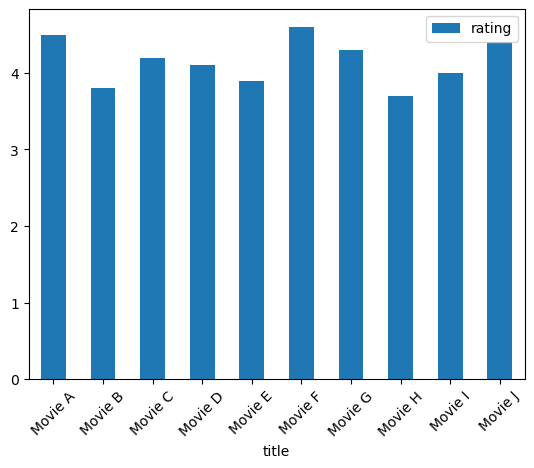

In [28]:
import matplotlib.pyplot as plt

# 8. Histogram of movie ratings
df_movies[["title", "rating"]].set_index("title").plot(kind="bar", rot=45)

# Exercise 3

You are given four pandas DataFrames: `df_customers`, `df_purchases`, `df_returns`, and `df_products`. These DataFrames contain information about customers, their purchases, returns, and product details in an online retail store. Your task is to merge and manipulate the DataFrames to answer a series of questions.

1. Merge the DataFrames df_customers, df_purchases, df_returns, and df_products based on the appropriate columns.
1. Calculate the total revenue generated by each customer, taking into account both purchases and returns.
1. Determine the number of purchases made by each customer.
1. Identify the most frequently returned product.
1. Concatenate the df_purchases and df_returns DataFrames vertically to create a single DataFrame containing all transactions.
1. Calculate the average unit price of each product across all transactions.

In [84]:
df_customers = pd.DataFrame(
    {
        "customer_id": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        "name": [
            "Alice",
            "Bob",
            "Charlie",
            "David",
            "Eve",
            "Frank",
            "Grace",
            "Henry",
            "Isabella",
            "Jack",
        ],
        "email": [
            "alice@example.com",
            "bob@example.com",
            "charlie@example.com",
            "david@example.com",
            "eve@example.com",
            "frank@example.com",
            "grace@example.com",
            "henry@example.com",
            "isabella@example.com",
            "jack@example.com",
        ],
    }
)

df_purchases = pd.DataFrame(
    {
        "customer_id": [1, 2, 3, 2, 4, 5, 1, 6, 7, 8],
        "product_id": [1, 2, 3, 2, 1, 4, 1, 3, 2, 4],
        "quantity": [2, 3, 1, 4, 2, 1, 3, 2, 1, 2],
        "unit_price": [
            10.99,
            19.99,
            9.99,
            15.99,
            12.99,
            8.99,
            14.99,
            11.99,
            10.99,
            13.99,
        ],
    }
)

df_returns = pd.DataFrame(
    {
        "customer_id": [2, 3, 4, 1, 5, 6, 9],
        "product_id": [2, 3, 1, 4, 1, 3, 2],
        "quantity": [1, 1, 2, 1, 2, 1, 1],
    }
)

df_products = pd.DataFrame(
    {
        "product_id": [1, 2, 3, 4],
        "product_name": ["Widget A", "Widget B", "Widget C", "Widget D"],
        "category": ["Electronics", "Electronics", "Home", "Home"],
    }
)

**1. Merge the tables**
In this case I will merge all the tables

In [85]:
# 1. Merge the DataFrames df_customers, df_purchases, df_returns, and df_products based on the appropriate columns.

# Merge purchases and returns to get the total quantity of each product bought and returned by each customer
# Then change the column names to reflect the units bought and returned. (quantuty_x -> units_bought, quantity_y -> units_returned)
merged = pd.merge(
    df_purchases, df_returns, on=["customer_id", "product_id"], how="outer"
)
merged = merged.rename(
    columns={"quantity_x": "units_bougth", "quantity_y": "units_returned"}
)

# Merge the products DataFrame to get the product name and category for each product
merged = pd.merge(df_products, merged, on="product_id", how="left")

# Merge the customers DataFrame to get the customer name and email for each customer
merged = pd.merge(df_customers, merged, on="customer_id", how="left")

merged.head()

,customer_id,name,email,product_id,product_name,category,units_bougth,unit_price,units_returned
0,1,Alice,alice@example.com,1.0,Widget A,Electronics,2.0,10.99,NaN
1,1,Alice,alice@example.com,1.0,Widget A,Electronics,3.0,14.99,NaN
2,1,Alice,alice@example.com,4.0,Widget D,Home,NaN,NaN,1.0
3,2,Bob,bob@example.com,2.0,Widget B,Electronics,3.0,19.99,1.0
4,2,Bob,bob@example.com,2.0,Widget B,Electronics,4.0,15.99,1.0


In [86]:
# 2. Total revenue generated by each customer, considering both purchases and returns

# Set all the NaN values in the units returned column to 0. This means that the product weren't returned
merged["units_returned"] = merged["units_returned"].fillna(0.0)

# Drop all rows where the units bought are NaN. This means that the product were returned without being bought.
# Maybe the product were bought in a previous transaction and then returned in a different transaction.
# But, in this case, we are only interested in the transactions where the product were bought and returned in this dataset
merged = merged.dropna(subset=["units_bougth"])

# Calculate the net units bought by subtracting the units returned from the units bought
merged["net_units"] = merged["units_bougth"] - merged["units_returned"]

# Calculate the revenue generated by each customer by multiplying the net units bought by the unit price
merged["revenue"] = merged["net_units"] * merged["unit_price"]

# Calculate the total revenue generated by each customer
total_revenue_per_customer = merged_df.groupby("customer_id")["revenue"].sum()

In [87]:
total_revenue_per_customer

customer_id
1     66.95
2    123.93
3      9.99
4     25.98
5      8.99
6     23.98
7     10.99
8     27.98
Name: revenue, dtype: float64

In [88]:
# 3. Number of purchases made by each customer
number_of_purchases_per_customer = merged_df.groupby("customer_id").size()

In [89]:
number_of_purchases_per_customer

customer_id
1    2
2    2
3    1
4    1
5    1
6    1
7    1
8    1
dtype: int64

In [90]:
# 4. Most frequently returned product
merged.groupby("product_name")["units_returned"].sum()

# Answer: Widget A, B, C

product_name
Widget A    2.0
Widget B    2.0
Widget C    2.0
Widget D    0.0
Name: units_returned, dtype: float64

In [96]:
# 5. Concatenate the `df_purchases` and `df_returns` DataFrames vertically

transactions_df = pd.concat([df_purchases, df_returns], ignore_index=True)

In [97]:
transactions_df

,customer_id,product_id,quantity,unit_price
0,1,1,2,10.99
1,2,2,3,19.99
2,3,3,1,9.99
3,2,2,4,15.99
4,4,1,2,12.99
5,5,4,1,8.99
6,1,1,3,14.99
7,6,3,2,11.99
8,7,2,1,10.99
9,8,4,2,13.99


In [98]:
# 6. Average unit price of each product across all purchases
df_purchases.groupby("product_id")["unit_price"].mean()

product_id
1    12.990000
2    15.656667
3    10.990000
4    11.490000
Name: unit_price, dtype: float64